C:\Users\Fatma\AppData\Local\Temp\ipykernel_17616\2027488947.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=top_10_predictions, palette='viridis')


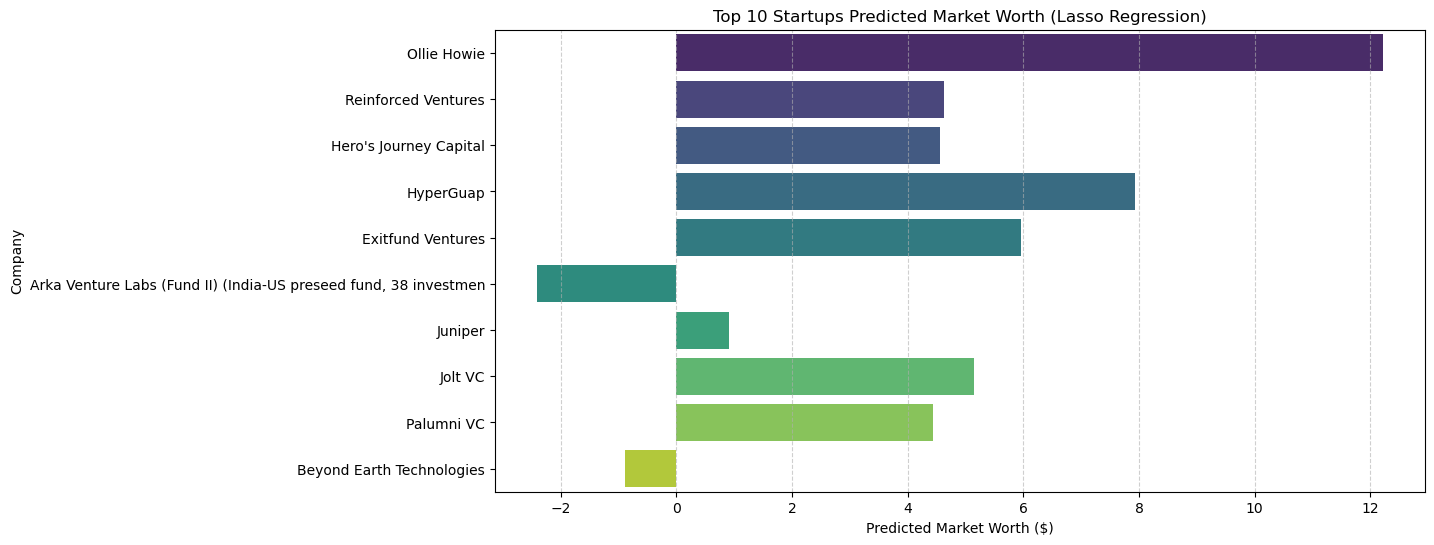

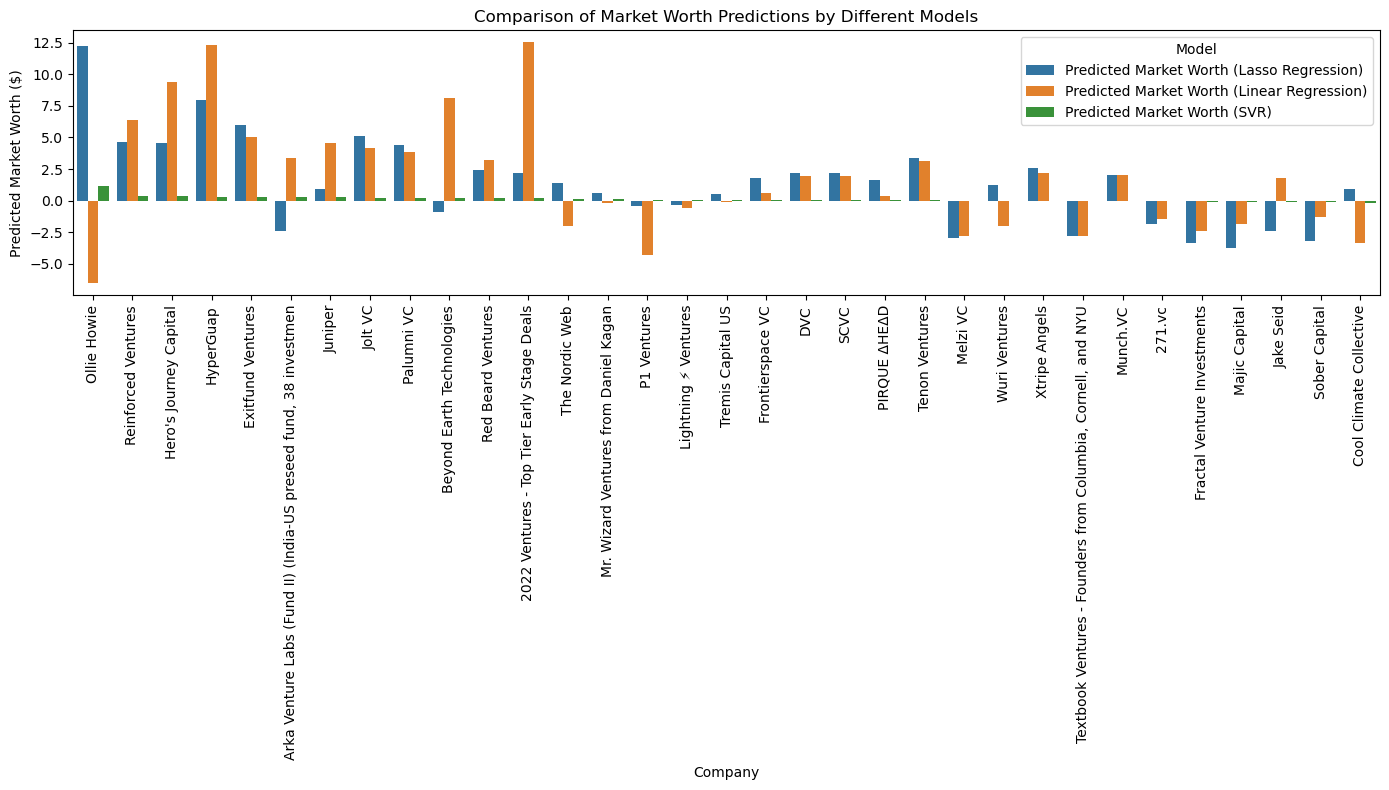

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predictions CSV file
df_predictions = pd.read_csv(r"C:\Users\Fatma\projet-python\Predicting-Profitable-Startups\predections\startup_predictions_sorted.csv")

# Check if the necessary columns are present
if 'Predicted Market Worth (Lasso Regression)' not in df_predictions.columns or 'Company' not in df_predictions.columns:
    print("Error: Required columns are missing!")
else:
    # Visualization: Plot the top 10 startups predicted market worth
    top_10_predictions = df_predictions.head(10)

   
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=top_10_predictions, palette='viridis')
    plt.title("Top 10 Startups Predicted Market Worth (Lasso Regression)")
    plt.xlabel("Predicted Market Worth ($)")
    plt.ylabel("Company")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)  
    plt.show()

    
    comparison_data = df_predictions[['Company', 'Predicted Market Worth (Lasso Regression)', 
                                      'Predicted Market Worth (Linear Regression)', 
                                      'Predicted Market Worth (SVR)']]
    
    
    comparison_data_melted = comparison_data.melt(id_vars='Company', 
                                                 value_vars=['Predicted Market Worth (Lasso Regression)', 
                                                             'Predicted Market Worth (Linear Regression)', 
                                                             'Predicted Market Worth (SVR)'], 
                                                 var_name='Model', value_name='Predicted Market Worth')

    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Company', y='Predicted Market Worth', hue='Model', data=comparison_data_melted)

    plt.title("Comparison of Market Worth Predictions by Different Models")
    plt.xlabel("Company")
    plt.ylabel("Predicted Market Worth ($)")
    plt.xticks(rotation=90)
    plt.legend(title='Model')
    plt.tight_layout()  
    plt.show()

In [2]:
# Check for missing values in the dataset
missing_values = df_predictions.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
follow on rate                                0
number of deals (12months)                    0
Startup Age                                   0
Stage_Other                                   0
Stage_Pre-Seed                                0
                                             ..
Actual Market Worth                           0
Predicted Market Worth (Lasso Regression)     0
Predicted Market Worth (Linear Regression)    0
Predicted Market Worth (SVR)                  0
investment by stage                           1
Length: 64, dtype: int64


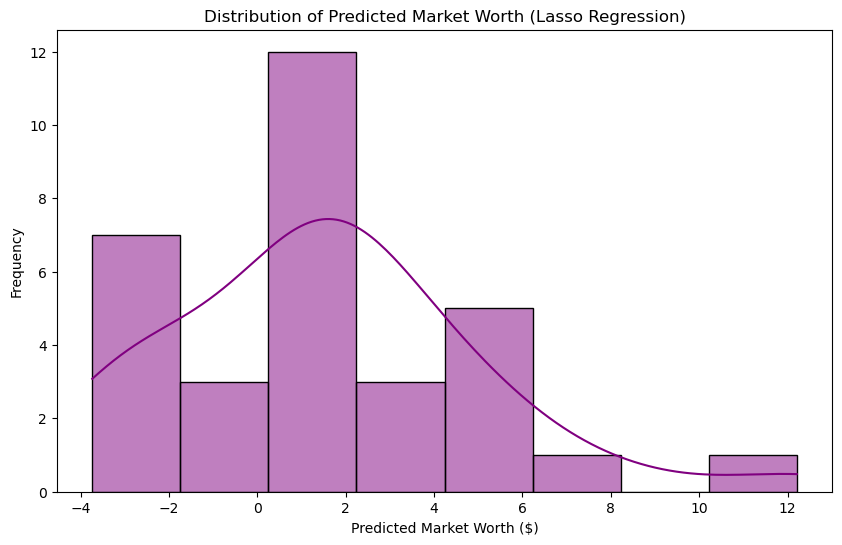

In [3]:
# Handle missing values (example: drop rows with missing values)
df_predictions = df_predictions.dropna()
df_predictions = df_predictions.fillna(0)  # Replace NaN with 0, or use an appropriate strategy
plt.figure(figsize=(10, 6))
sns.histplot(df_predictions['Predicted Market Worth (Lasso Regression)'], kde=True, color='purple')
plt.title("Distribution of Predicted Market Worth (Lasso Regression)")
plt.xlabel("Predicted Market Worth ($)")
plt.ylabel("Frequency")
plt.show()

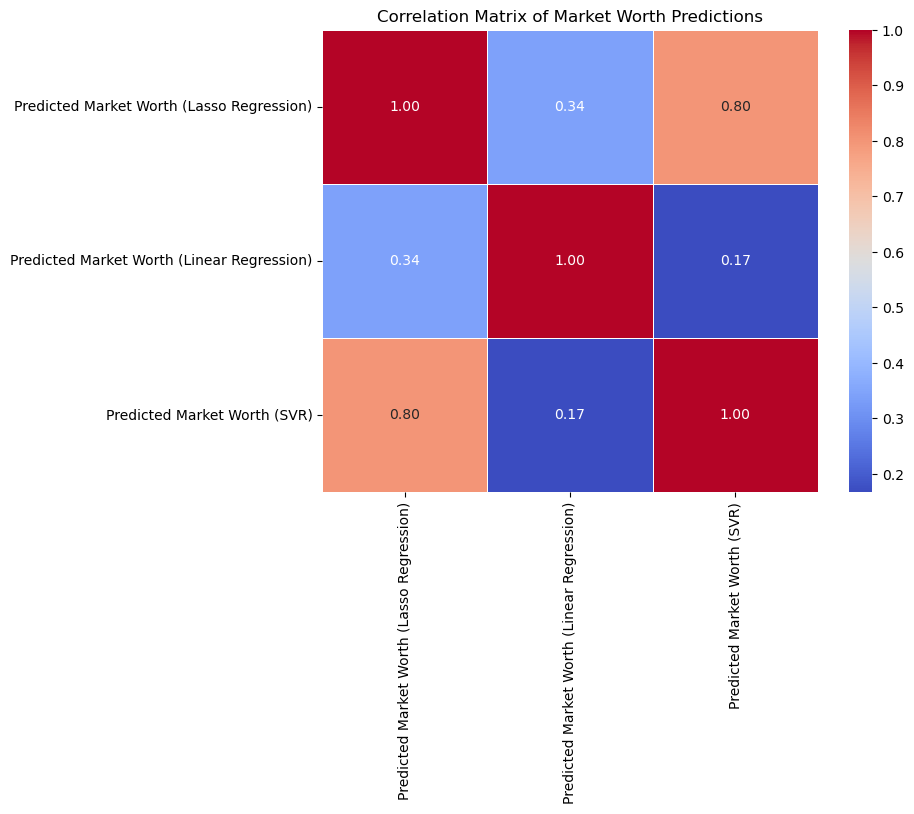

In [4]:
# Calculate the correlation matrix
correlation_matrix = df_predictions[['Predicted Market Worth (Lasso Regression)', 
                                     'Predicted Market Worth (Linear Regression)', 
                                     'Predicted Market Worth (SVR)']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Market Worth Predictions")
plt.show()

C:\Users\Fatma\AppData\Local\Temp\ipykernel_17616\182543676.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=combined_predictions, palette='coolwarm')


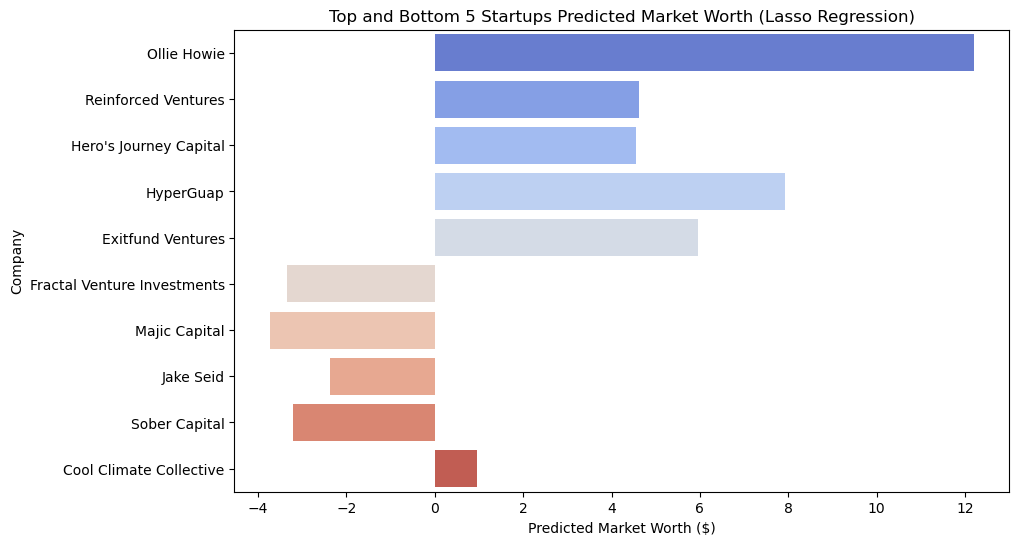

In [5]:
# Get the top 5 and bottom 5 startups based on Lasso predictions
top_5 = df_predictions.head(5)
bottom_5 = df_predictions.tail(5)

# Combine top 5 and bottom 5 for visualization
combined_predictions = pd.concat([top_5, bottom_5])

plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=combined_predictions, palette='coolwarm')
plt.title("Top and Bottom 5 Startups Predicted Market Worth (Lasso Regression)")
plt.xlabel("Predicted Market Worth ($)")
plt.ylabel("Company")
plt.show()

Lasso Regression - MAE: 2.9034166395194045 RMSE: 3.7603639617260773 R²: 0.0
Linear Regression - MAE: 3.596937583611866 RMSE: 4.7790459377439385 R²: 0.0
SVR - MAE: 0.16679761859882192 RMSE: 0.27173307019820303 R²: 0.0


C:\Users\Fatma\AppData\Local\Temp\ipykernel_17616\2066341776.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=top_10_predictions, palette='viridis')


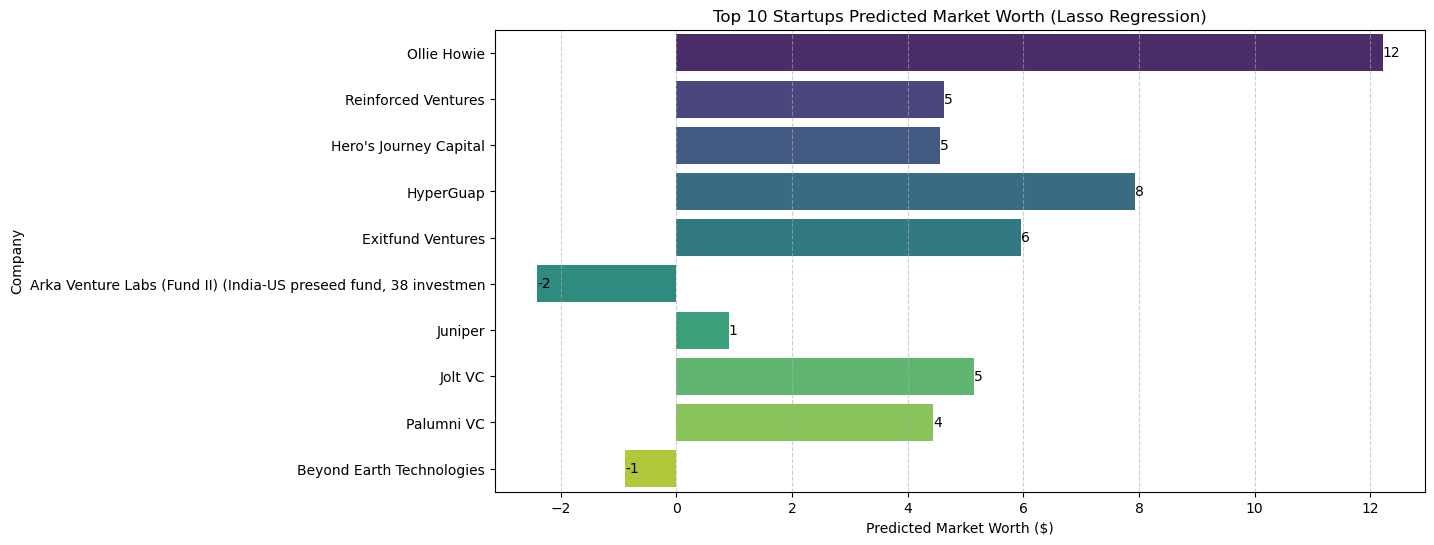

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you have actual values in your dataset (e.g., 'Actual Market Worth')
y_true = df_predictions['Actual Market Worth']
y_pred_lasso = df_predictions['Predicted Market Worth (Lasso Regression)']
y_pred_lr = df_predictions['Predicted Market Worth (Linear Regression)']
y_pred_svr = df_predictions['Predicted Market Worth (SVR)']

# Calculate metrics for Lasso model
mae_lasso = mean_absolute_error(y_true, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_true, y_pred_lasso))
r2_lasso = r2_score(y_true, y_pred_lasso)

# Calculate metrics for Linear Regression model
mae_lr = mean_absolute_error(y_true, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_true, y_pred_lr))
r2_lr = r2_score(y_true, y_pred_lr)

# Calculate metrics for SVR model
mae_svr = mean_absolute_error(y_true, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_true, y_pred_svr))
r2_svr = r2_score(y_true, y_pred_svr)

# Print the model performance
print("Lasso Regression - MAE:", mae_lasso, "RMSE:", rmse_lasso, "R²:", r2_lasso)
print("Linear Regression - MAE:", mae_lr, "RMSE:", rmse_lr, "R²:", r2_lr)
print("SVR - MAE:", mae_svr, "RMSE:", rmse_svr, "R²:", r2_svr)

plt.figure(figsize=(12, 6))
sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=top_10_predictions, palette='viridis')
for index, value in enumerate(top_10_predictions['Predicted Market Worth (Lasso Regression)']):
    plt.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center")
plt.title("Top 10 Startups Predicted Market Worth (Lasso Regression)")
plt.xlabel("Predicted Market Worth ($)")
plt.ylabel("Company")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

C:\Users\Fatma\AppData\Local\Temp\ipykernel_17616\3003599048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=top_10_predictions, palette='viridis')


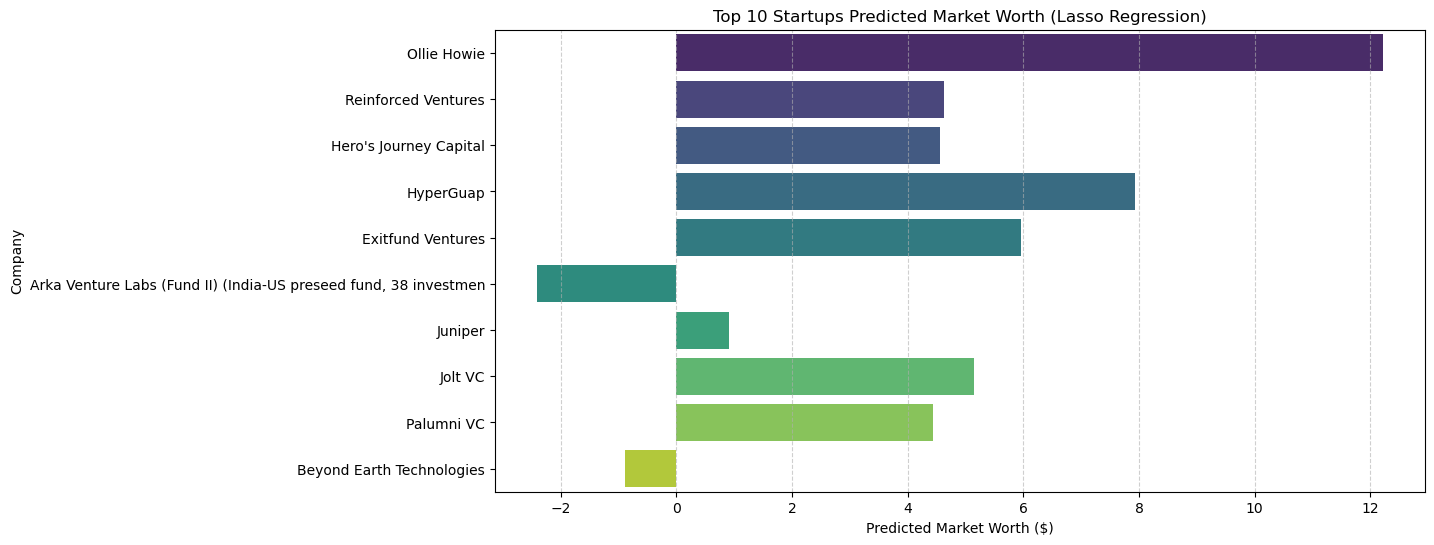

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Predicted Market Worth (Lasso Regression)', y='Company', data=top_10_predictions, palette='viridis')
plt.title("Top 10 Startups Predicted Market Worth (Lasso Regression)")
plt.xlabel("Predicted Market Worth ($)")
plt.ylabel("Company")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.savefig("top_10_predictions.png")  # Save the plot as a PNG image
plt.show()